In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from helpers import dump_pickle, load_pickle

In [5]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [6]:
colors = ["#e83034", "#ff7f02", "#11c10c", "#047cdd", "#aa29bb"]
colors_teal = ["#14befc"]
dist_plot_style = dict(edgecolor="white", linewidth=2)

In [7]:
df = load_pickle('tass/dfRaw')

In [8]:
df.shape[0]

11122

In [9]:
df['length'] = df['text'].str.len()

In [10]:
sns.set_palette(colors)
bars = alt.Chart(df.sort_values(['category'])).mark_bar(size=50).encode(
    x=alt.X("category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'category'],
    color=alt.Color('category', scale={"range": colors}),
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)


In [11]:
# Saving space
# (bars + text).interactive().properties(
#     height=300, 
#     width=480,
#     title="Number of articles in each category",
# )

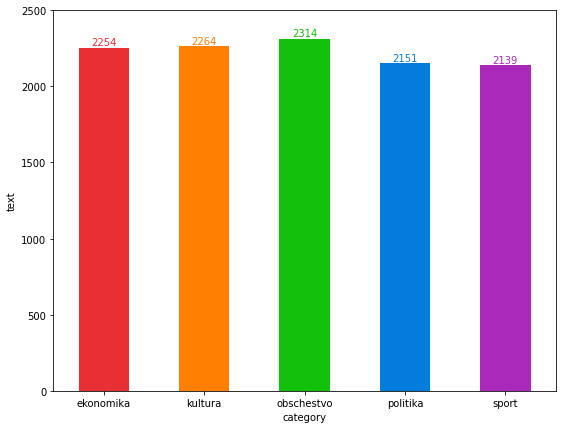

In [12]:
sns.set_palette(colors)
plt.figure(figsize=(9,7))
plt.margins(y=0.1)
plt.ylim(0,2500)
sums = df.groupby('category').count().reset_index()
ax = sns.barplot(data=sums, x='category', y='text', saturation=1, dodge=False)

bar_width = 0.5

for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    patch.set_width(bar_width)
    patch.set_x(patch.get_x() + diff * .5)

for index, row in sums.iterrows():
    ax.text(index, row.text+17, row.text,
            color=colors[index], ha='center')

/Users/leon/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'News text length distribution')

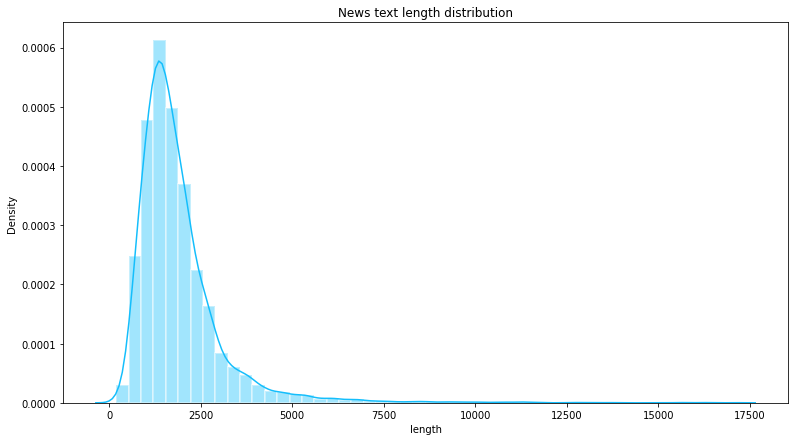

In [13]:
sns.set_palette(colors_teal)
plt.figure(figsize=(13,7))
sns.distplot(df.sort_values(['category'])['length'], hist_kws=dist_plot_style).set_title('News text length distribution')

In [14]:
df['length'].describe()

count    11122.000000
mean      1893.095127
std       1208.241399
min        198.000000
25%       1202.000000
50%       1619.000000
75%       2208.750000
max      17090.000000
Name: length, dtype: float64

In [15]:
df_95 = df[df['length'] < df['length'].quantile(0.95)]

In [16]:
sns.set_palette(colors)
bars = alt.Chart(df_95.sort_values(['category'])).mark_bar(size=50).encode(
    x=alt.X("category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'category'],
    color=alt.Color('category', scale={"range": colors}),
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

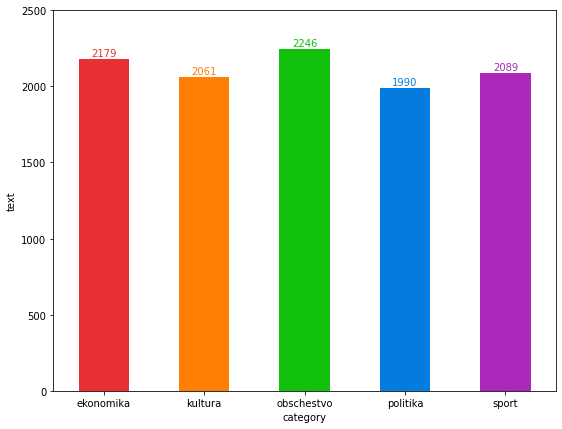

In [17]:
sns.set_palette(colors)
plt.figure(figsize=(9,7))
plt.margins(y=0.1)
plt.ylim(0,2500)
sums = df_95.groupby('category').count().reset_index()
ax = sns.barplot(data=sums, x='category', y='text', saturation=1, dodge=False)

bar_width = 0.5

for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    patch.set_width(bar_width)
    patch.set_x(patch.get_x() + diff * .5)

for index, row in sums.iterrows():
    ax.text(index, row.text+17, row.text,
            color=colors[index], ha='center')

In [18]:
# Saving space
# (bars + text).properties(
#     height=300, 
#     width=480,
#     title="Number of articles in each category",
# )

/Users/leon/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'News text length distribution')

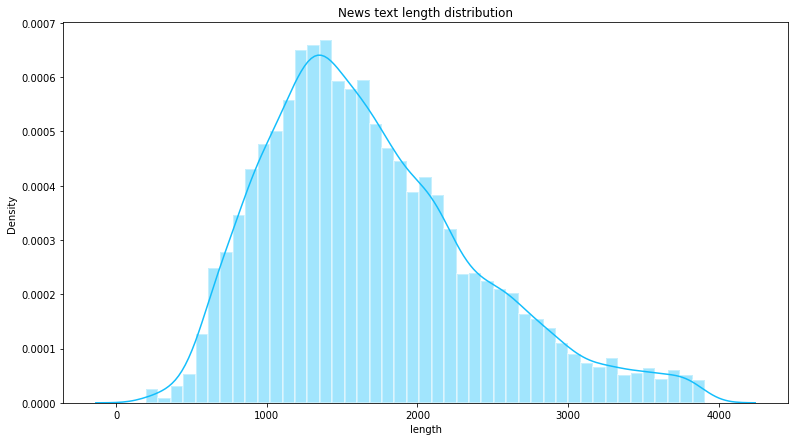

In [19]:
sns.set_palette(colors_teal)
plt.figure(figsize=(13,7))
sns.distplot(df_95['length'], hist_kws=dist_plot_style).set_title('News text length distribution')

In [20]:
df_long = df[df['length'] > 7500]
df_long.shape[0]

78

In [21]:
df_long.iloc[0]

filename                                         11357969.txt
category                                           obschestvo
url                               tass.ru/obschestvo/11357969
text        Догнать Европу. Николай I строил железные доро...
length                                                   7896
Name: 226, dtype: object

<AxesSubplot:xlabel='category', ylabel='length'>

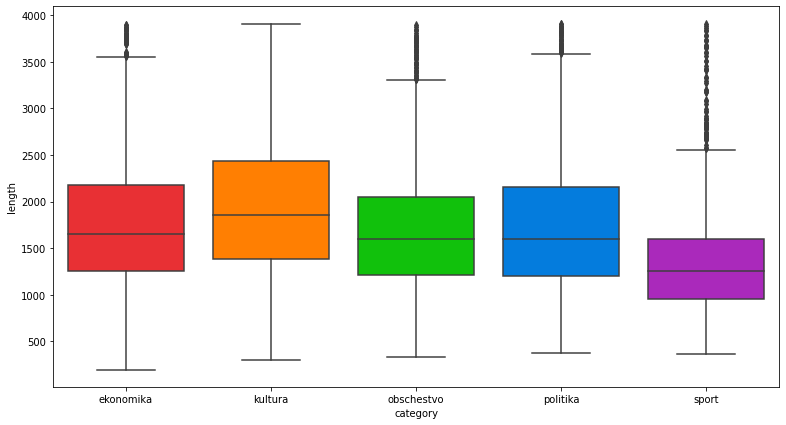

In [22]:
sns.set_palette(colors)
plt.figure(figsize=(13,7))
sns.boxplot(data=df_95.sort_values(['category']), x='category', y='length', saturation=1)

In [ ]:
dump_pickle('tass/df95', df_95)